In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/banking_transactions_1000_records.csv")
df.head()

,customer_id,age,gender,city,employment_type,annual_income,account_balance,credit_score,txn_date,txn_type,txn_channel,merchant_category,txn_amount,is_weekend,account_active
0,1168,36,Female,Chennai,Student,1258824,121615,759,2024-02-01,Debit,NEFT,Entertainment,216,0,1
1,1214,50,Male,Bangalore,Self-employed,668484,162147,592,2024-02-25,Credit,Card,Shopping,2548,1,0
2,1218,51,Female,Mumbai,Self-employed,982553,168052,610,2024-02-04,Debit,UPI,EMI,360,1,0
3,1213,41,Female,Bangalore,Self-employed,308345,169666,716,2024-05-10,Credit,NEFT,Shopping,18282,0,1
4,1081,40,Female,Pune,Salaried,377117,84498,701,2024-05-30,Debit,UPI,Bills,2954,0,1


In [2]:
#Q1. How many total transactions?
df.shape[0]

1000

In [3]:
#Q2. How many unique customers?
df['customer_id'].nunique()

289

In [4]:
#Q3. Show summary statistics
df.describe()

,customer_id,age,annual_income,account_balance,credit_score,txn_amount,is_weekend,account_active
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1149.337000,38.058000,8.875024e+05,148265.514000,673.363000,9860.676000,0.284000,0.764000
std,88.206121,10.043082,3.494150e+05,85594.247648,72.154373,5618.152178,0.451162,0.424835
min,1001.000000,21.000000,3.005100e+05,5080.000000,550.000000,208.000000,0.000000,0.000000
25%,1071.000000,30.000000,5.867840e+05,74497.000000,608.000000,5079.750000,0.000000,1.000000
50%,1150.000000,38.000000,8.964210e+05,148032.000000,674.000000,9808.000000,0.000000,1.000000
75%,1228.000000,47.000000,1.182120e+06,223213.000000,735.000000,14669.500000,1.000000,1.000000
max,1300.000000,55.000000,1.499442e+06,299945.000000,800.000000,19971.000000,1.000000,1.000000


In [5]:
#Q4. Debit vs Credit transaction count
df['txn_type'].value_counts()

,count
txn_type,
Debit,522
Credit,478


In [6]:
#Q5. Total debit and credit amount
df.groupby('txn_type')['txn_amount'].sum()

,txn_amount
txn_type,
Credit,4736453
Debit,5124223


In [7]:
#Q6. Average transaction amount by channel
df.groupby('txn_channel')['txn_amount'].mean().sort_values(ascending=False)

,txn_amount
txn_channel,
ATM,10071.328125
NEFT,9945.954545
Card,9898.358650
UPI,9545.600000


In [8]:
#Q7. Top 10 spending customers
df[df['txn_type']=='Debit'].groupby('customer_id')['txn_amount'].sum().sort_values(ascending=False).head(10)

,txn_amount
customer_id,
1064,78139
1156,65776
1031,56007
1007,55735
1240,55412
1034,53129
1005,52635
1192,51620
1154,51168


In [9]:
#Q8. Average transaction amount per customer
df.groupby('customer_id')['txn_amount'].mean()

,txn_amount
customer_id,
1001,14151.200000
1002,13037.500000
1003,15838.500000
1004,10009.166667
1005,14992.666667
...,...
1296,12565.000000
1297,7900.666667
1298,5701.500000


In [10]:
#Q9. Customers marked inactive
df[df['account_active']==0]['customer_id'].unique()

array([1214, 1218, 1260, 1266, 1193, 1081, 1227, 1216, 1049, 1147, 1154,
       1248, 1281, 1008, 1085, 1215, 1196, 1042, 1201, 1217, 1146, 1245,
       1116, 1131, 1010, 1079, 1021, 1034, 1015, 1032, 1082, 1144, 1024,
       1284, 1117, 1069, 1267, 1213, 1040, 1268, 1067, 1035, 1184, 1137,
       1276, 1095, 1242, 1211, 1007, 1107, 1186, 1300, 1065, 1169, 1262,
       1206, 1247, 1171, 1118, 1205, 1123, 1191, 1039, 1173, 1102, 1149,
       1011, 1036, 1255, 1014, 1235, 1254, 1200, 1210, 1190, 1041, 1256,
       1163, 1115, 1103, 1023, 1289, 1162, 1288, 1009, 1068, 1155, 1253,
       1166, 1236, 1013, 1222, 1003, 1151, 1175, 1280, 1179, 1004, 1045,
       1243, 1199, 1100, 1028, 1279, 1265, 1275, 1283, 1071, 1209, 1054,
       1051, 1092, 1124, 1271, 1152, 1264, 1208, 1141, 1026, 1249, 1096,
       1127, 1125, 1192, 1017, 1298, 1048, 1251, 1228, 1001, 1098, 1030,
       1087, 1240, 1229, 1113, 1286, 1110, 1074, 1043, 1198, 1150, 1159,
       1031, 1241, 1178, 1158, 1072, 1299, 1037, 11

In [11]:
#Q10. Monthly transaction trend
df['txn_date'] = pd.to_datetime(df['txn_date'])
df['month'] = df['txn_date'].dt.to_period('M')
df.groupby('month')['txn_amount'].sum()

,txn_amount
month,
2024-01,1713684
2024-02,1638603
2024-03,1571593
2024-04,1734457
2024-05,1598394
2024-06,1603945


In [12]:
#Q11. Weekend vs Weekday spending
df.groupby('is_weekend')['txn_amount'].sum()

,txn_amount
is_weekend,
0,7141710
1,2718966


In [13]:
#Q12. Spend-to-income ratio per customer
total_spend = df[df['txn_type']=='Debit'].groupby('customer_id')['txn_amount'].sum().reset_index()
income = df[['customer_id','annual_income']].drop_duplicates()
ratio = pd.merge(total_spend, income, on='customer_id')
ratio['spend_income_ratio'] = ratio['txn_amount']/ratio['annual_income']
ratio.head()

,customer_id,txn_amount,annual_income,spend_income_ratio
0,1001,28853,1066195,0.027062
1,1001,28853,710285,0.040622
2,1001,28853,1322935,0.021810
3,1001,28853,376858,0.076562
4,1001,28853,466183,0.061892


In [14]:
#Q13. Risk flag (credit score < 600 OR high transaction)
df['risk_flag'] = np.where((df['credit_score'] < 600) |
                           (df['txn_amount'] > df['txn_amount'].quantile(0.95)), 1, 0)
df[['customer_id','risk_flag']].head()

,customer_id,risk_flag
0,1168,0
1,1214,1
2,1218,0
3,1213,0
4,1081,0


In [15]:
#Q14. Churn flag
df['churn_flag'] = np.where((df['account_active']==0) | (df['account_balance']<2000),1,0)
df[['customer_id','churn_flag']].head()

,customer_id,churn_flag
0,1168,0
1,1214,1
2,1218,1
3,1213,0
4,1081,0


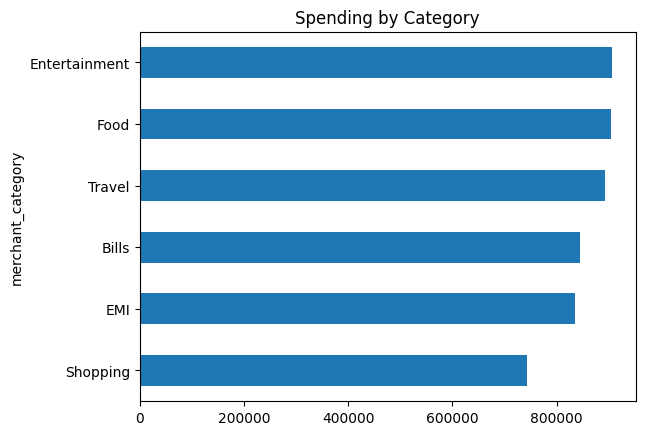

In [16]:
#Q15. Spending by merchant category
df[df['txn_type']=='Debit'].groupby('merchant_category')['txn_amount'].sum().sort_values().plot(kind='barh')
plt.title("Spending by Category")
plt.show()

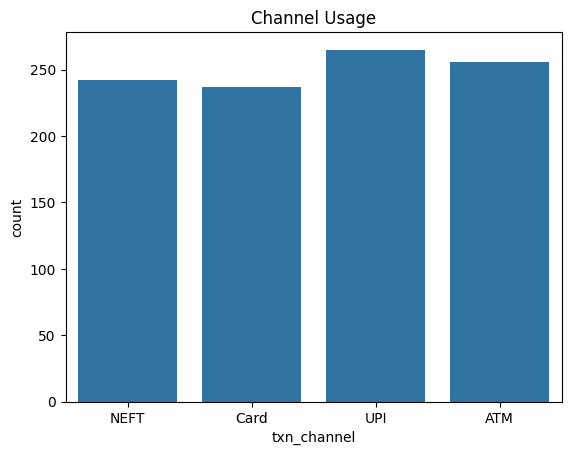

In [17]:
#Q16. Channel usage
sns.countplot(data=df, x='txn_channel')
plt.title("Channel Usage")
plt.show()

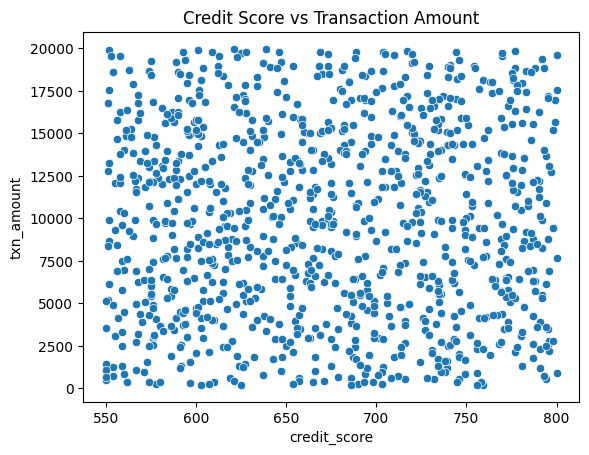

In [18]:
#Q17. Credit score vs transaction amount
sns.scatterplot(data=df, x='credit_score', y='txn_amount')
plt.title("Credit Score vs Transaction Amount")
plt.show()

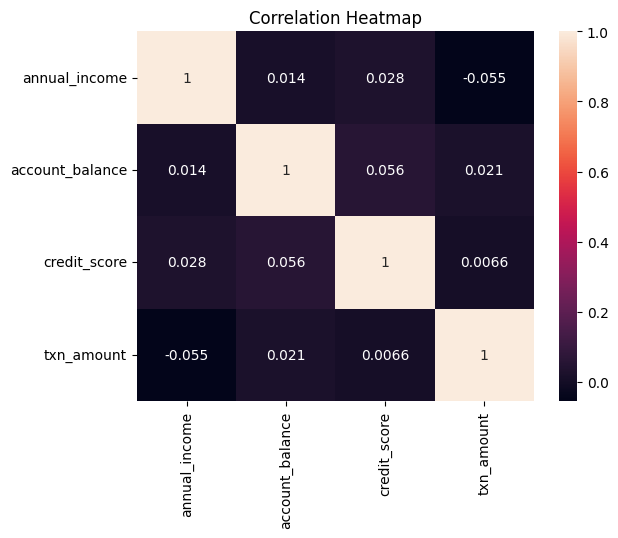

In [19]:
#Q18. Correlation heatmap
sns.heatmap(df[['annual_income','account_balance','credit_score','txn_amount']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [20]:
#Q19. High spenders (ratio > 0.5)
ratio[ratio['spend_income_ratio'] > 0.5]

,customer_id,txn_amount,annual_income,spend_income_ratio


In [21]:
#Q20. Top 5 cities by spending
df.groupby('city')['txn_amount'].sum().sort_values(ascending=False).head()

,txn_amount
city,
Bangalore,1724564
Pune,1706188
Chennai,1651215
Mumbai,1610004
Hyderabad,1596538
